In [1]:
pip install scipy

   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   - -------------------------------------- 1.3/41.0 MB 6.2 MB/s eta 0:00:07
   --- ------------------------------------ 3.7/41.0 MB 8.8 MB/s eta 0:00:05
   ---- ----------------------------------- 4.2/41.0 MB 6.7 MB/s eta 0:00:06
   ---- ----------------------------------- 4.7/41.0 MB 5.4 MB/s eta 0:00:07
   ----- ---------------------------------- 5.2/41.0 MB 4.9 MB/s eta 0:00:08
   ----- ---------------------------------- 5.8/41.0 MB 4.7 MB/s eta 0:00:08
   ------ --------------------------------- 6.6/41.0 MB 4.4 MB/s eta 0:00:08
   ------ --------------------------------- 7.1/41.0 MB 4.2 MB/s eta 0:00:09
   ------- -------------------------------- 7.6/41.0 MB 4.0 MB/s eta 0:00:09
   -------- ------------------------------- 8.4/41.0 MB 3.9 MB/s eta 0:00:09
   -------- ------------------------------- 9.2/41.0 MB 3.9 MB/s eta 0:00:09
   --------- ------------------------------ 10.0/41.0 MB 3.9 MB/s eta 0:00:08
   --

In [11]:
import pandas as pd
order = pd.read_csv('SuperStore_Orders.csv', sep = ',', delimiter = None, header = 'infer', names = None, index_col = None, usecols = None, encoding='latin-1')
print(order)

              order_id  order_date   ship_date       ship_mode  \
0         AG-2011-2040  01-01-2011  06-01-2011  Standard Class   
1        IN-2011-47883  01-01-2011  08-01-2011  Standard Class   
2         HU-2011-1220  01-01-2011  05-01-2011    Second Class   
3      IT-2011-3647632  01-01-2011  05-01-2011    Second Class   
4        IN-2011-47883  01-01-2011  08-01-2011  Standard Class   
...                ...         ...         ...             ...   
51285   CA-2014-115427  31-12-2014  04-01-2015  Standard Class   
51286     MO-2014-2560  31-12-2014  05-01-2015  Standard Class   
51287   MX-2014-110527  31-12-2014  02-01-2015    Second Class   
51288   MX-2014-114783  31-12-2014  06-01-2015  Standard Class   
51289   CA-2014-156720  31-12-2014  04-01-2015  Standard Class   

          customer_name      segment             state        country  market  \
0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
1           Joseph Holt     Consumer   New So

In [12]:
order.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [14]:
new_data = order[['country', 'product_id', 'category', 'sales', 'quantity', 'discount', 'profit']]
print(new_data)

             country        product_id         category sales  quantity  \
0            Algeria  OFF-TEN-10000025  Office Supplies   408         2   
1          Australia   OFF-SU-10000618  Office Supplies   120         3   
2            Hungary  OFF-TEN-10001585  Office Supplies    66         4   
3             Sweden   OFF-PA-10001492  Office Supplies    45         3   
4          Australia   FUR-FU-10003447        Furniture   114         5   
...              ...               ...              ...   ...       ...   
51285  United States   OFF-BI-10002103  Office Supplies    14         2   
51286        Morocco  OFF-WIL-10001069  Office Supplies     4         1   
51287      Nicaragua   OFF-LA-10004182  Office Supplies    26         3   
51288         Mexico   OFF-LA-10000413  Office Supplies     7         1   
51289  United States   OFF-FA-10003472  Office Supplies     3         3   

       discount    profit  
0           0.0  106.1400  
1           0.1   36.0360  
2           0.0

In [16]:
# data negara
pd.set_option('display.max_rows', None) 
negara = new_data['country'].value_counts()

print(negara)

country
United States                       9994
Australia                           2837
France                              2827
Mexico                              2644
Germany                             2065
China                               1880
United Kingdom                      1633
Brazil                              1599
India                               1555
Indonesia                           1390
Turkey                              1378
Italy                               1108
Nigeria                              905
Spain                                859
Dominican Republic                   742
El Salvador                          736
Cuba                                 724
Honduras                             713
Philippines                          681
New Zealand                          628
Nicaragua                            614
Iran                                 607
Guatemala                            521
Egypt                                487
South Af

In [17]:
data_fix = new_data[new_data['country'] == 'Indonesia'][['product_id', 'category', 'sales', 'quantity', 'discount', 'profit']]
print(data_fix)

             product_id         category  sales  quantity  discount     profit
51      OFF-ST-10000344  Office Supplies     50         3      0.17     6.0084
53      OFF-FA-10000549  Office Supplies     41         7      0.47   -27.0942
92      TEC-PH-10001730       Technology    240         2      0.17   -11.6028
128     TEC-PH-10002806       Technology    554         4      0.17    40.0536
131     OFF-AR-10003613  Office Supplies    334         9      0.27    13.4703
134     FUR-FU-10001096        Furniture    188         5      0.27     2.4735
145     OFF-BI-10004334  Office Supplies      5         1      0.17    -0.0147
202     OFF-AR-10000989  Office Supplies    150         4      0.27   -49.3488
203     OFF-AR-10000251  Office Supplies     51         3      0.27    -0.0126
326     OFF-BI-10002885  Office Supplies     12         3      0.17     4.2273
341     FUR-CH-10003950        Furniture    334         1      0.27  -109.9365
353     OFF-ST-10004365  Office Supplies    142     

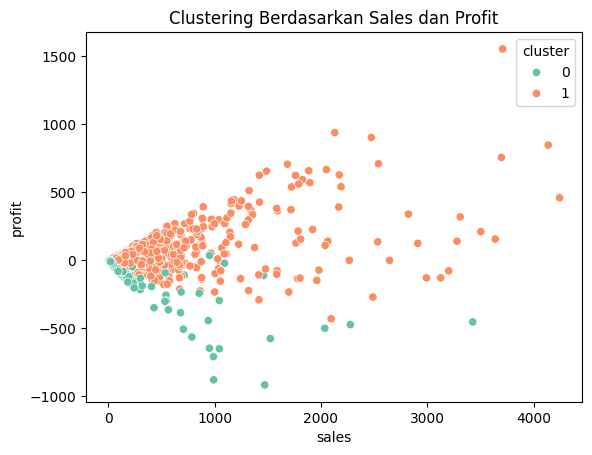

Silhouette Score: 0.355
          product_id         category  sales  quantity  discount   profit  \
53   OFF-FA-10000549  Office Supplies   41.0         7      0.47 -27.0942   
382  OFF-EN-10004144  Office Supplies   82.0        13      0.47 -17.3901   
395  OFF-EN-10002472  Office Supplies  132.0         5      0.47  -5.0505   
396  OFF-SU-10000375  Office Supplies   90.0         5      0.47 -51.2175   
832  OFF-EN-10004495  Office Supplies  109.0         9      0.47 -74.4147   

     cluster  
53         0  
382        0  
395        0  
396        0  
832        0  
 
          product_id         category  sales  quantity  discount   profit  \
51   OFF-ST-10000344  Office Supplies   50.0         3      0.17   6.0084   
92   TEC-PH-10001730       Technology  240.0         2      0.17 -11.6028   
128  TEC-PH-10002806       Technology  554.0         4      0.17  40.0536   
131  OFF-AR-10003613  Office Supplies  334.0         9      0.27  13.4703   
134  FUR-FU-10001096        Furnitur

In [64]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ambil fitur numerik saja untuk clustering
data_fix['sales'] = data_fix['sales'].astype(str).str.replace(',', '').astype(float)

X1 = data_fix[['sales', 'quantity', 'discount', 'profit']]

# 2. Standarisasi
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X1)

# 3. Jalankan KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=30)  # ubah jumlah cluster sesuai kebutuhan
data_fix['cluster'] = kmeans.fit_predict(X_scaled1)

# 4. Visualisasi hasil (misal pakai sales & profit)
sns.scatterplot(data=data_fix, x='sales', y='profit', hue='cluster', palette='Set2')
plt.title('Clustering Berdasarkan Sales dan Profit')
plt.show()

from sklearn.metrics import silhouette_score

# Asumsikan kamu sudah punya X_scaled dan hasil clustering di df['cluster']
score = silhouette_score(X_scaled1, data_fix['cluster'])
print(f'Silhouette Score: {score:.3f}')

cluster_0 = data_fix[data_fix['cluster'] == 0]
cluster_1 = data_fix[data_fix['cluster'] == 1]

print(cluster_0.head())
print(' ')
print(cluster_1.head())


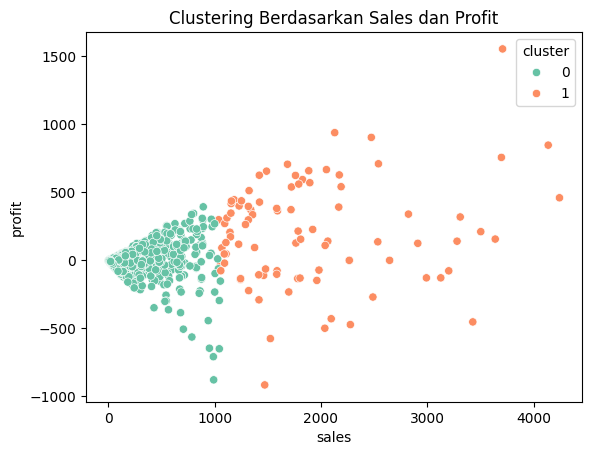

Silhouette Score: 0.824
          product_id         category  sales  quantity  discount   profit  \
51   OFF-ST-10000344  Office Supplies   50.0         3      0.17   6.0084   
53   OFF-FA-10000549  Office Supplies   41.0         7      0.47 -27.0942   
92   TEC-PH-10001730       Technology  240.0         2      0.17 -11.6028   
128  TEC-PH-10002806       Technology  554.0         4      0.17  40.0536   
131  OFF-AR-10003613  Office Supplies  334.0         9      0.27  13.4703   

     cluster  
51         0  
53         0  
92         0  
128        0  
131        0  
 
           product_id         category   sales  quantity  discount    profit  \
868   TEC-CO-10002350       Technology  1055.0         3      0.07  -34.0830   
1748  OFF-AP-10001621  Office Supplies  1244.0         3      0.17 -134.8956   
2284  FUR-BO-10002444        Furniture  2540.0         7      0.07  709.9365   
2480  FUR-CH-10003841        Furniture  1038.0         8      0.27  298.5096   
2732  TEC-PH-10001990

In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ambil fitur numerik saja untuk clustering
data_fix['sales'] = data_fix['sales'].astype(str).str.replace(',', '').astype(float)

X = data_fix[['sales', 'quantity', 'discount', 'profit']]


# 2. Jalankan KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=30)  # ubah jumlah cluster sesuai kebutuhan
data_fix['cluster'] = kmeans.fit_predict(X)

# 3. Visualisasi hasil (misal pakai sales & profit)
sns.scatterplot(data=data_fix, x='sales', y='profit', hue='cluster', palette='Set2')
plt.title('Clustering Berdasarkan Sales dan Profit')
plt.show()

from sklearn.metrics import silhouette_score

# Asumsikan kamu sudah punya X_scaled dan hasil clustering di df['cluster']
score = silhouette_score(X, data_fix['cluster'])
print(f'Silhouette Score: {score:.3f}')

cluster_0 = data_fix[data_fix['cluster'] == 0]
cluster_1 = data_fix[data_fix['cluster'] == 1]

print(cluster_0.head())
print(' ')
print(cluster_1.head())

In [33]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install scikit-learn


   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ------ --------------------------------- 1.8/10.7 MB 10.6 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/10.7 MB 12.5 MB/s eta 0:00:01
   ------------------------ --------------- 6.6/10.7 MB 11.2 MB/s eta 0:00:01
   --------------------------------- ------ 8.9/10.7 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 10.1 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-lear